# Exploratory Data Analysis

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
train_df = pd.read_csv("../Data/cs-training.csv")
train_df.shape

(150000, 12)

In [54]:
train_df.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [55]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Unnamed: 0 представляет из себя ID => удалим столбец

In [57]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)

In [58]:
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### В признаке `age` минимальное значение 0, что противоречит здравому смыслу (помимо этого нет объектов, у которых возраст < 18 (возраст, с которого начинают выдавать кредиты))

In [60]:
train_df[train_df["age"] < 18]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


### В таком случае можем просто избавиться от этого объекта и не потерять информативности

In [62]:
train_df = train_df.drop(65695)

### Посмотрим на распределение таргета (есть ли дисбаланс классов и насколько серьезный?)

In [64]:
class_distribution = train_df['SeriousDlqin2yrs'].value_counts(normalize=True)
print(f"Доля объектов отрицательного класса: {class_distribution.get(0, 0):.3f}")
print(f"Доля объектов положительного класса: {class_distribution.get(1, 0):.3f}")

Доля объектов отрицательного класса: 0.933
Доля объектов положительного класса: 0.067


Text(0.5, 0, 'SeriousDlqin2yrs')

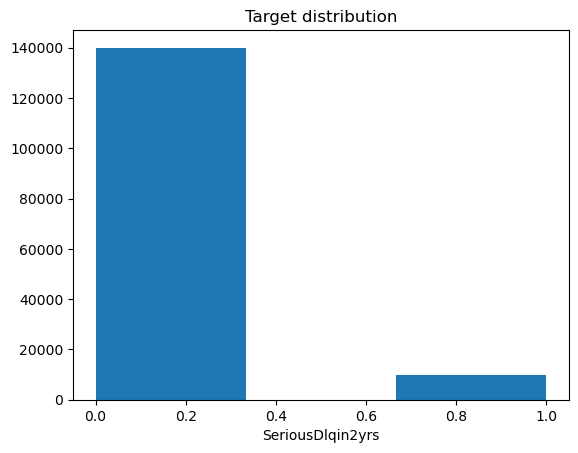

In [65]:
plt.hist(train_df["SeriousDlqin2yrs"], bins=3);
plt.title('Target distribution')
plt.xlabel("SeriousDlqin2yrs")

### Дисбаланс классов налицо, учтем этот факт при построении модели и её последующей оценке (=> accuracy явно неподходящая метрика качества в данном случае)

Посмотрим на пропуски

In [68]:
train_df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Пропусков многовато, а вкупе с сильным дисбалансом классов можно понять, что если просто избавимся от пропущенных значений, то рискуем потерять и без того малый объем данных о положительном классе 

Подробнее этот момент рассмотрим в preprocessing

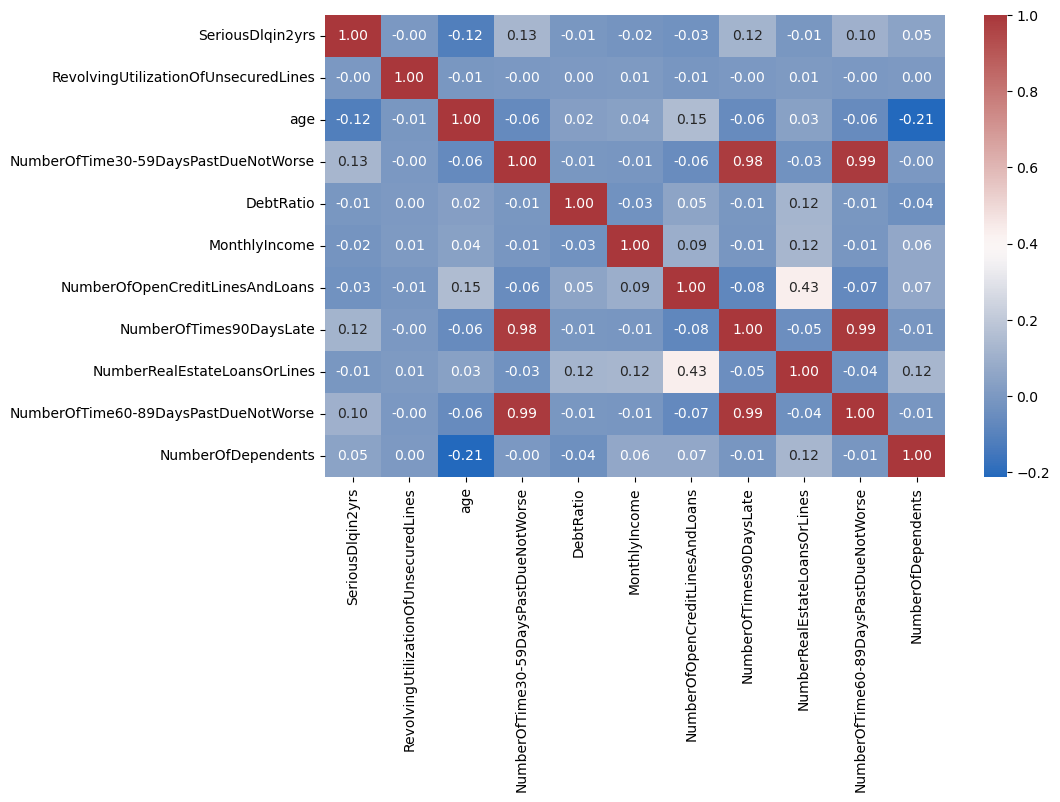

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), cmap="vlag", annot=True, fmt="0.2f");

Корреляция между признаками `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTimes90DaysLate`, `NumberOfTime60-89DaysPastDueNotWorse` превышает 0.95, что создает проблему мультиколлинеарности. 


Это приводит к неустойчивости оценок коэффициентов в линейных моделях, затрудняет
интерпретацию вклада каждого признака и может вызывать численную нестабильность 
при обращении матриц в методах типа MНK.

Хорошим решением будет объединить эти признаки в один агрегированный показатель, например, `PastDueAggregated`, либо оставить только один наиболее репрезентативный признак из этой группы

----------------------------------------

В признаках присутствуют выбросы, так что для наглядности стоит рассмотреть распределения признаков, исключив выбросы, а затем вместе с ними

### Для обнаружения выбросов рассматривал два подхода: трехсигмовый интервал и метод межквартильного размаха (IQR).

### Хотя теоретически ±3σ должен содержать ~99.7% данных нормального распределения (и не менее 88.9% для любых распределений по следствию из неравенства Чебышева), mean и std крайне чувствительны к выбросам, т.е. наличие даже одного экстремального значения искажает границы.

### IQR метод лишен этого недостатка - он робастен, так как использует квартили (Q1, Q3), устойчивые к выбросам. Вдобавок к этому его проще интерпретировать, а также можно настраивать коэффициентом k.

In [77]:
#Q1 (25-й перцентиль) - значение, ниже которого находится 25% данных
#Q2 (50-й перцентиль) - медиана, ниже которой 50% данных
#Q3 (75-й перцентиль) - значение, ниже которого находится 75% данных

# Параметр k позволяет задавать границы выбросов
# 1.5     - Для большинства случаев
# 1.0    - Меньше выбросов
# 2.0    - Больше выбросов  
# 3.0     - Только сильные выбросы

def iqr_method(df, column, k=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    
    outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outlier_mask]
    return outliers.index


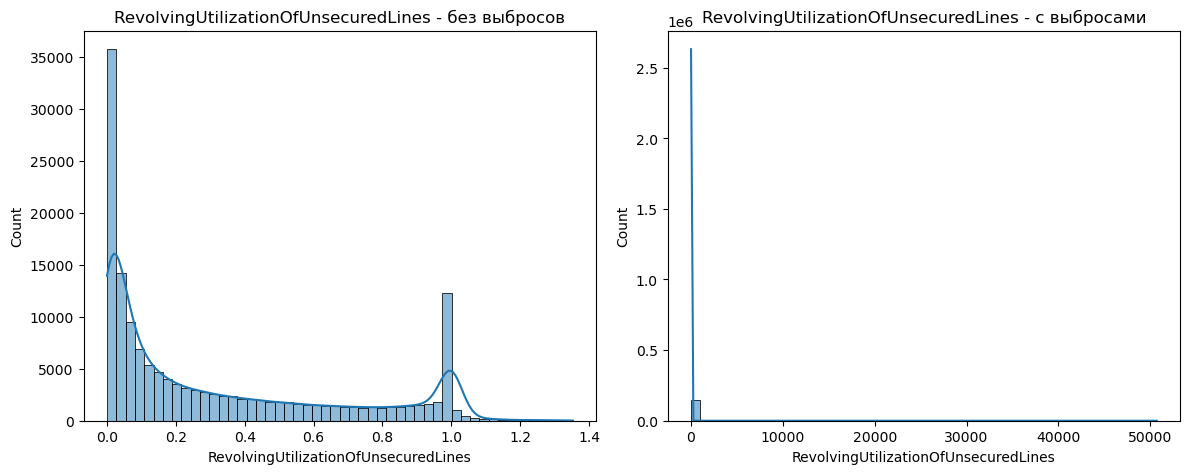

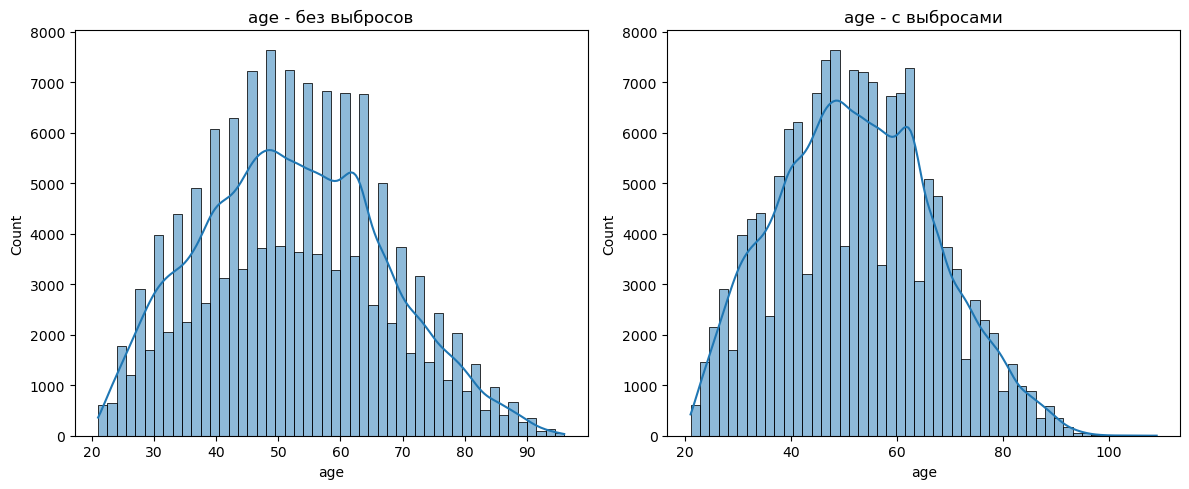

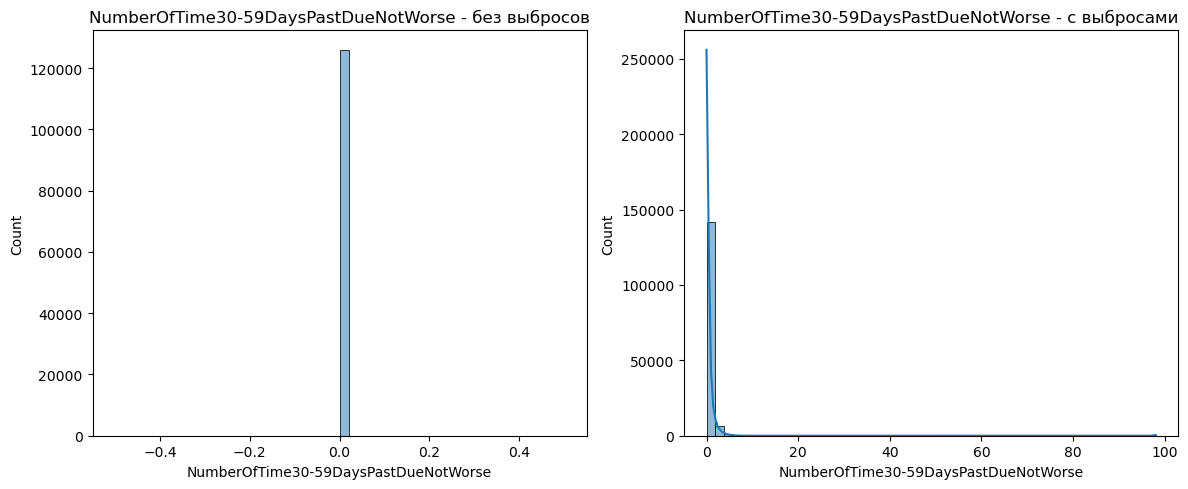

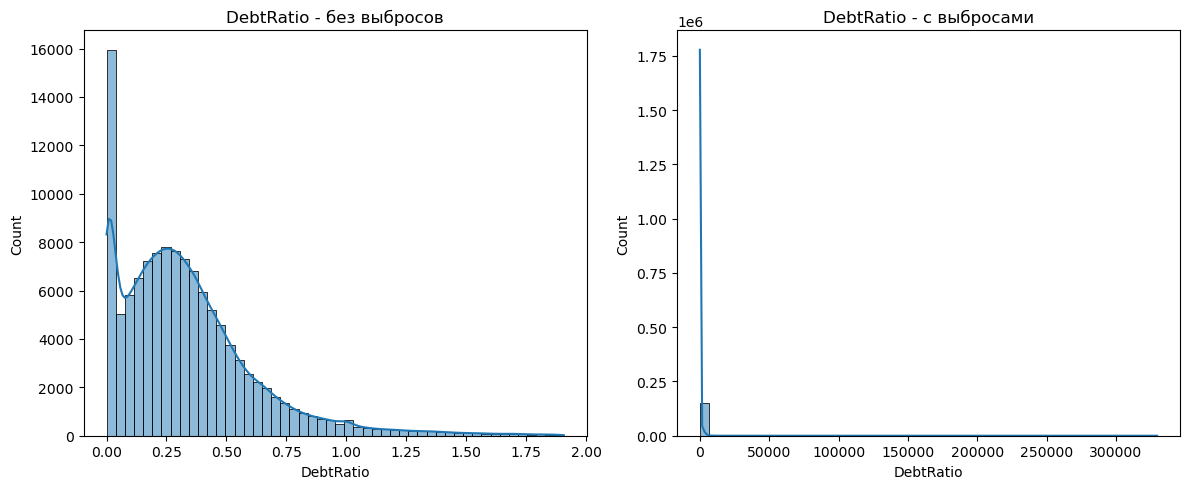

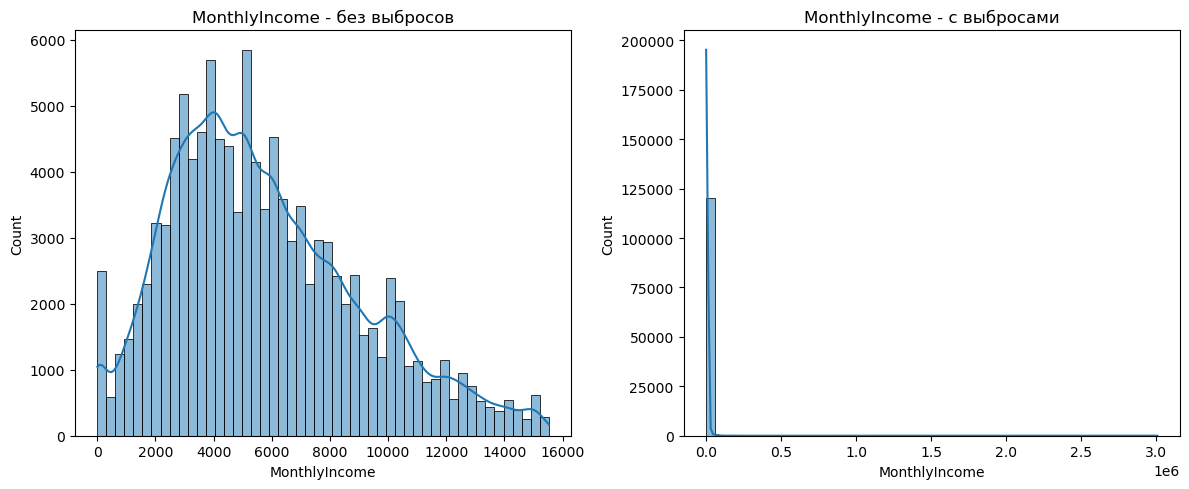

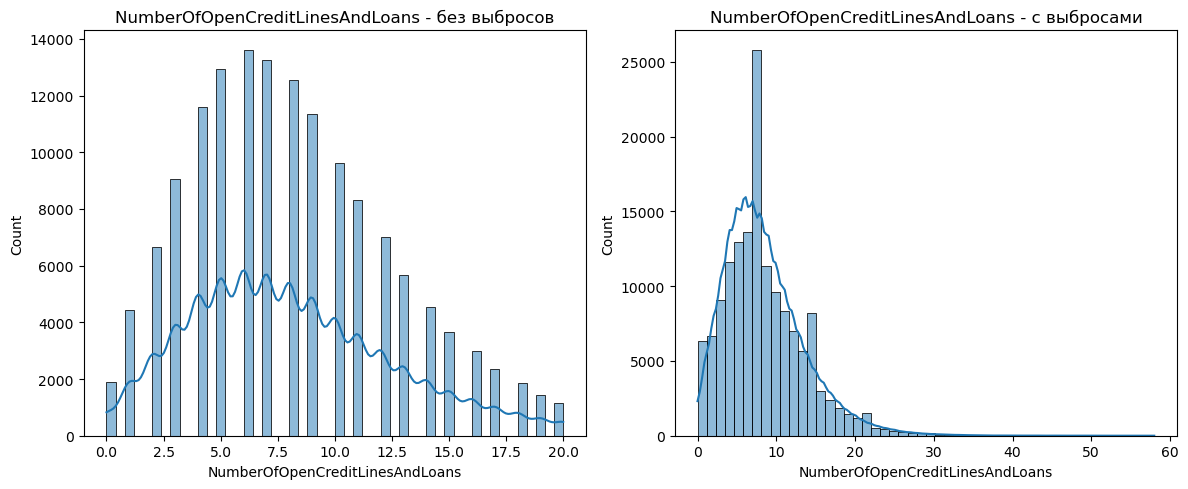

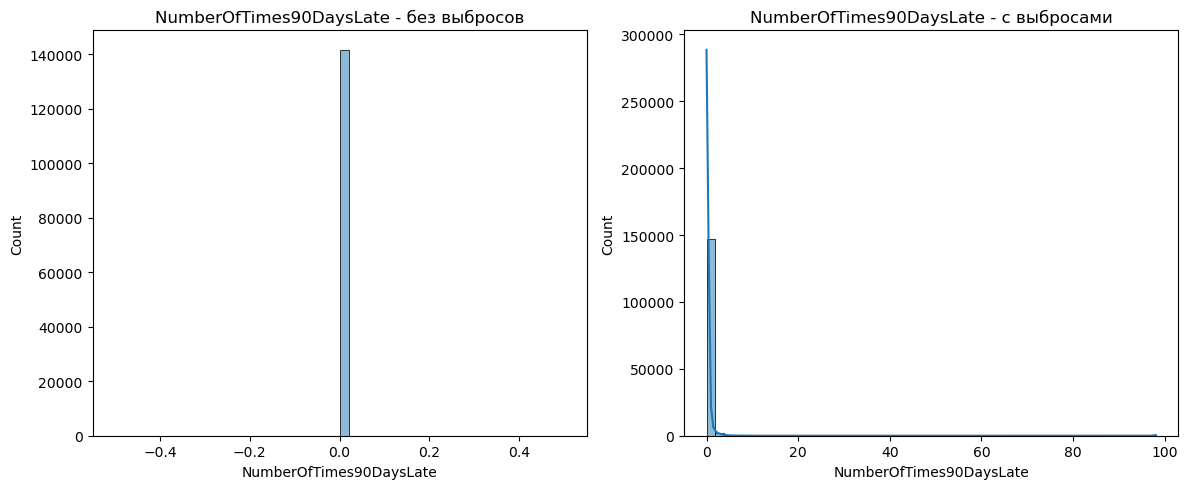

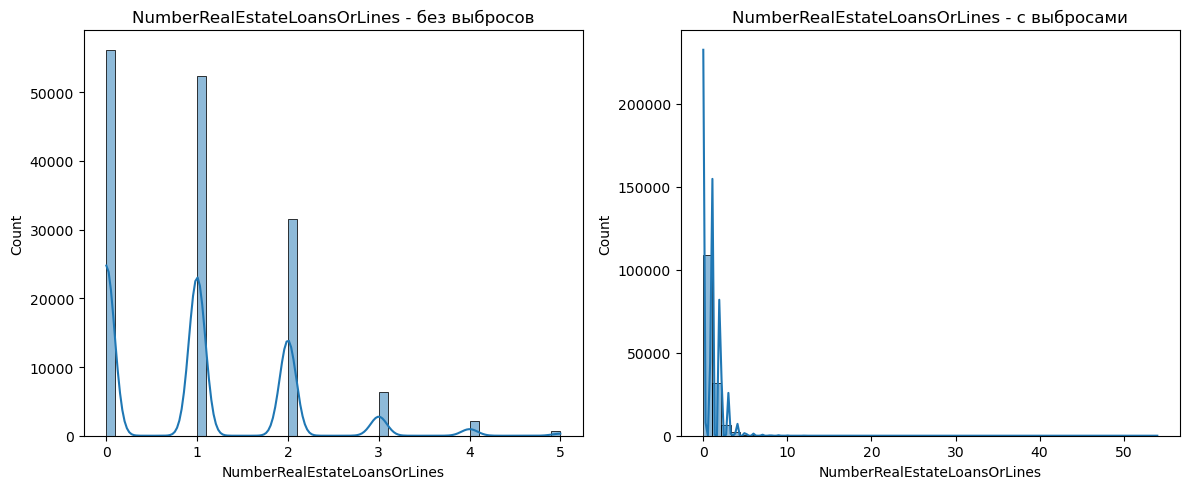

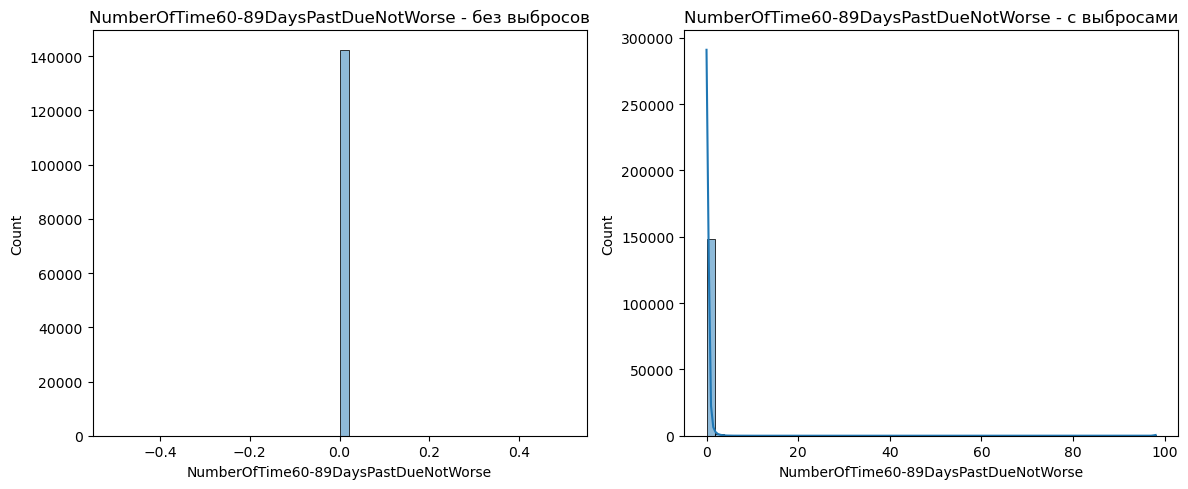

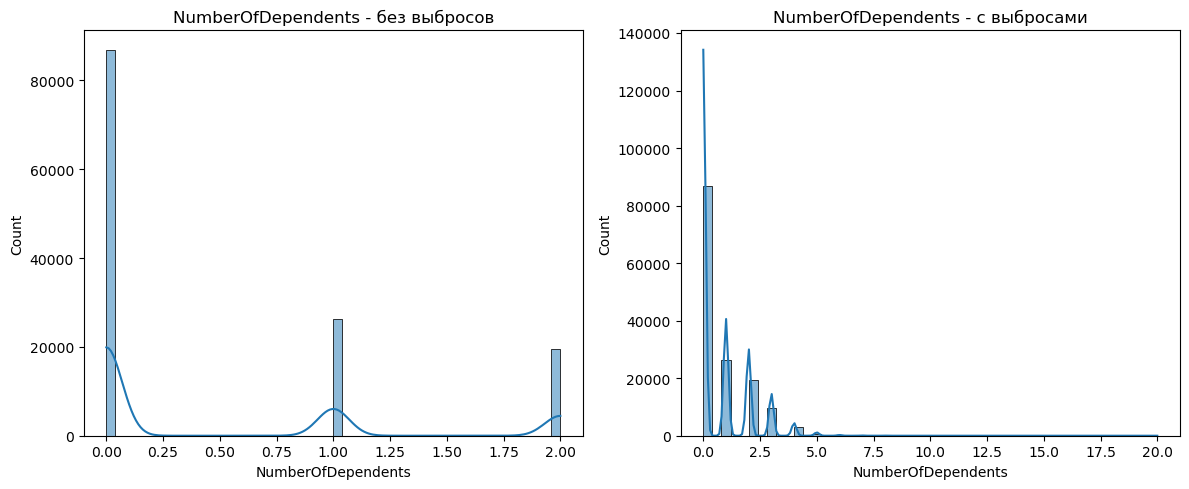

In [78]:
for c in train_df.columns.drop("SeriousDlqin2yrs"):
    fig = plt.figure(figsize=(12, 5))
    
    outliers = iqr_method(train_df, c)
    clean_df = train_df.drop(outliers)
    
    ax1 = plt.subplot(1, 2, 1)
    sns.histplot(clean_df[c], kde=True, bins=50)
    plt.title(f'{c} - без выбросов')
    plt.xlabel(c)
    
    ax2 = plt.subplot(1, 2, 2)
    sns.histplot(train_df[c], kde=True, bins=50)
    plt.title(f'{c} - с выбросами')
    plt.xlabel(c)
    
    plt.tight_layout()
    plt.show()

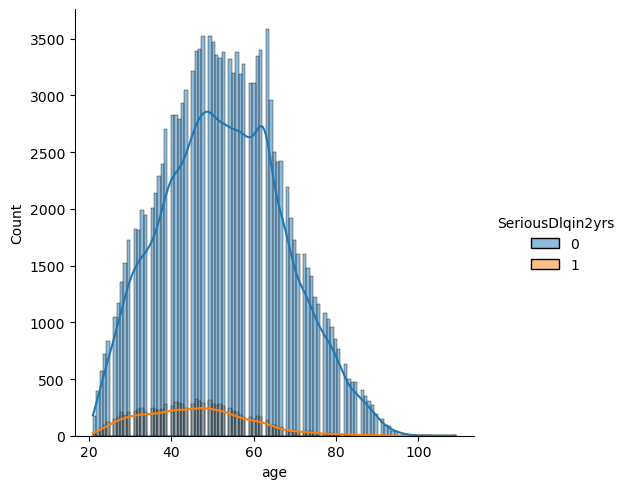

In [79]:
sns.displot(train_df, x="age", hue="SeriousDlqin2yrs", kde=True)
plt.show()

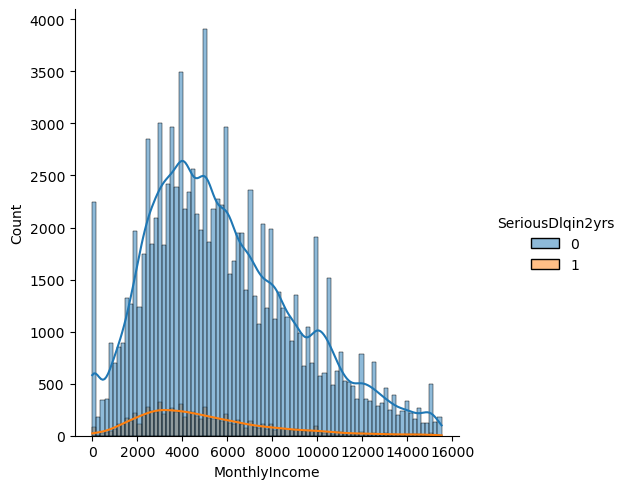

In [80]:
outliers = iqr_method(train_df, "MonthlyIncome")
clean_df = train_df.drop(outliers)

sns.displot(clean_df, x="MonthlyIncome",hue="SeriousDlqin2yrs", kde=True)
plt.show()

<Figure size 800x400 with 0 Axes>

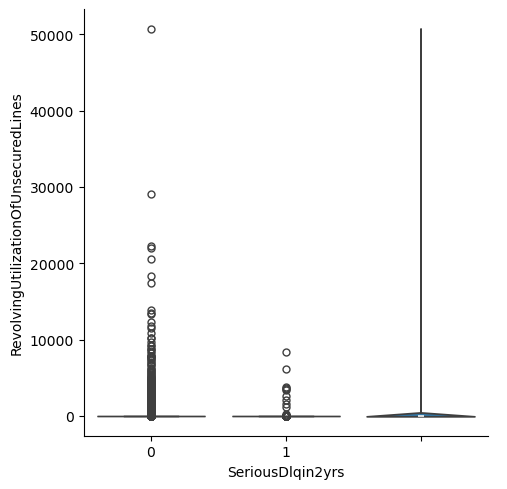

<Figure size 800x400 with 0 Axes>

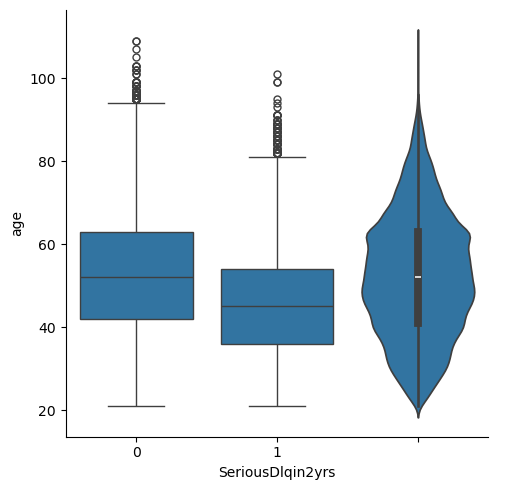

<Figure size 800x400 with 0 Axes>

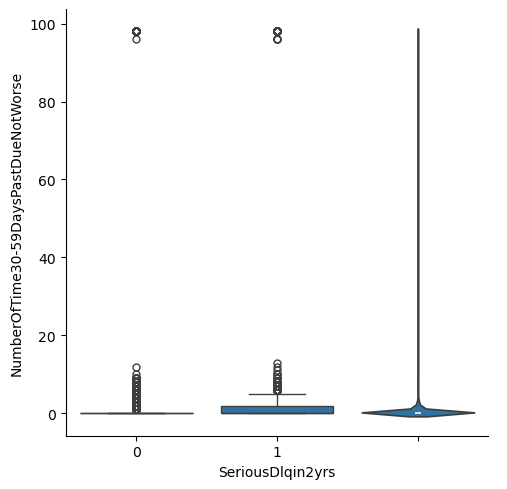

<Figure size 800x400 with 0 Axes>

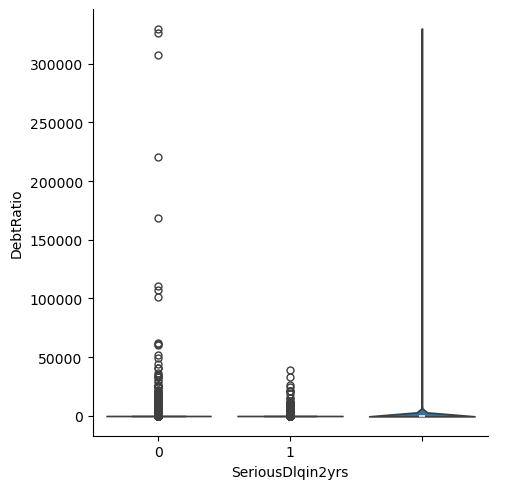

<Figure size 800x400 with 0 Axes>

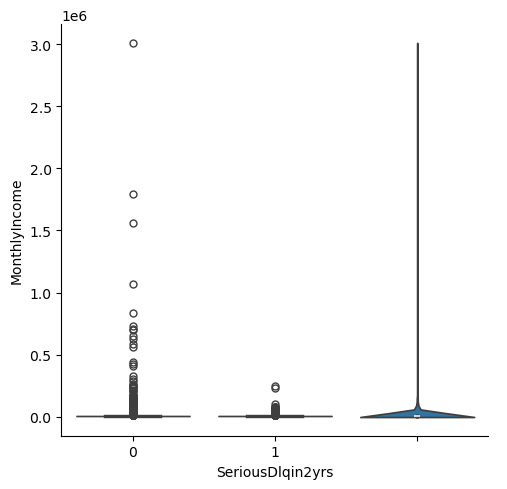

<Figure size 800x400 with 0 Axes>

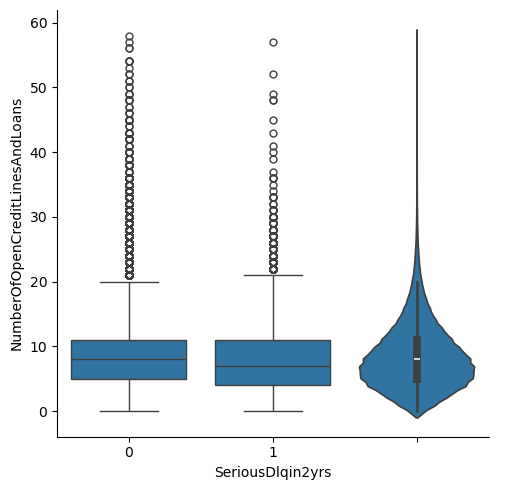

<Figure size 800x400 with 0 Axes>

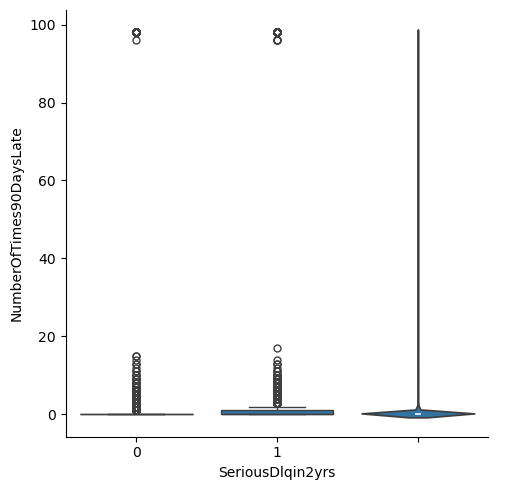

<Figure size 800x400 with 0 Axes>

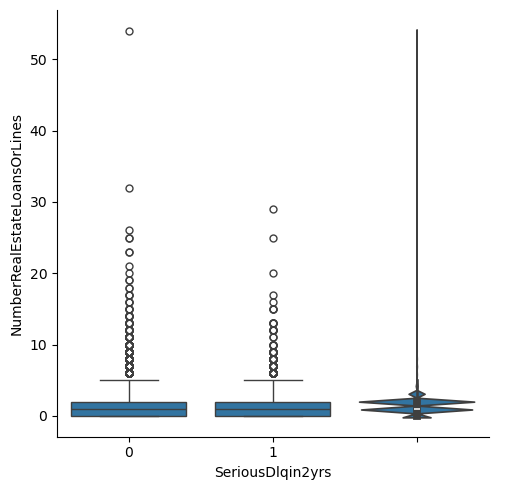

<Figure size 800x400 with 0 Axes>

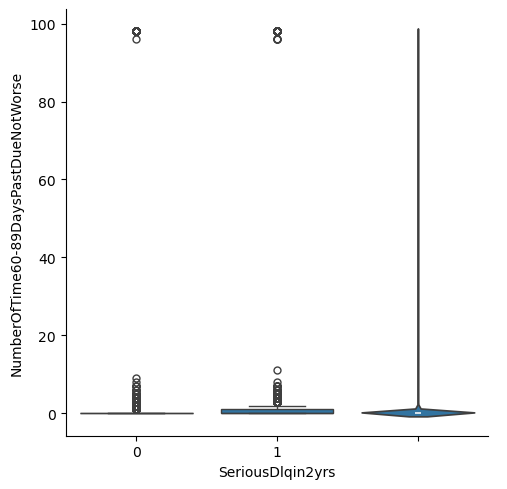

<Figure size 800x400 with 0 Axes>

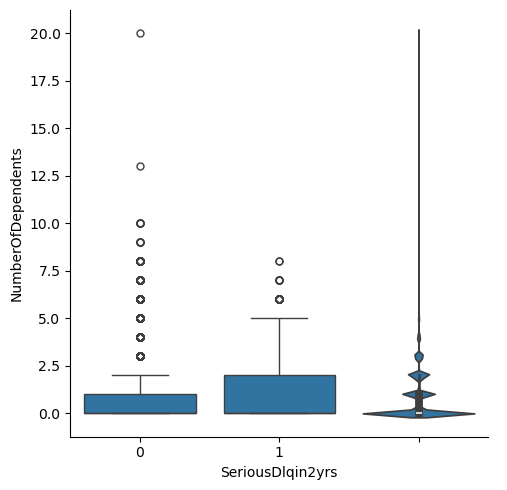

In [81]:
for c in train_df.columns.drop('SeriousDlqin2yrs'):
    plt.figure(figsize=(8, 4))
    sns.catplot(x="SeriousDlqin2yrs", y=c, data=train_df, kind="box")
   
    sns.violinplot(train_df[c])
    plt.show()


In [82]:
np.median(train_df["age"][train_df["SeriousDlqin2yrs"]==0]), np.median(train_df["age"][train_df["SeriousDlqin2yrs"]==1]) 

(52.0, 45.0)

In [83]:
train_df["age"][train_df["SeriousDlqin2yrs"]==0].quantile(0.25), train_df["age"][train_df["SeriousDlqin2yrs"]==1].quantile(0.25)

(42.0, 36.0)

In [84]:
train_df["age"][train_df["SeriousDlqin2yrs"]==0].quantile(0.75), train_df["age"][train_df["SeriousDlqin2yrs"]==1].quantile(0.75)

(63.0, 54.0)

### Видим смещение (разница в медианах и границах boxplots для признака `age`), что может дать гипотезу о том, что возраст неплохо описывает классы, т.к. более молодые субъекты чаще принадлежат положительному классу. В остальном можно сказать, что признаки в большинстве своем перекрываются

### Еще можно отметить сильную скошенность вправо у большинства признаков (хвосты у violinplots уходят сильно вверх)

----------------------

# Заключения из EDA:

* ## Присутствует серьезный дисбаланс классов (соотношение 93/7)
* ## В некоторых признаках наблюдается большое количество пропусков (целых 20% в `MonthlyIncome`), а также имеют место выбросы => не удаляем, попробуем для заполнения пропусков применить Iterative Imputer с BayesianRidge, который быстро работает с большим объемом данных, а для устранения выбросов воспользуемся методом винсоризации
* ## В распределении некоторых признаков наблюдается скошенность вправо, что показывает разброс более высоких значений. Для борьбы со skewness можно использовать логарифмическое преобразование (в нашем случае оно будет иметь вид `np.log1p()` (log(1+x)), т. к. значения должны быть > 0, в то время как минимальные значения наших признаков равны нулю)
* ## Признаки `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTimes90DaysLate`, `NumberOfTime60-89DaysPastDueNotWorse` сильно коррелируют между собой => объединим эти признаки в одну агрегированную фичу


